In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

import seaborn as sns
sns.set()
# run pip install: mplcursors. Used for interactive tooltip
import mplcursors

from operator import itemgetter

In [2]:
df = pd.read_csv("data/EdStatsData.csv")
# drop unnecessary information
df = df.drop('Unnamed: 69',axis=1)

## Education and Income - Enrollment in schools based on income groups

In [3]:
ig_df = pd.read_csv("data/income_groups.csv")
print("Types of income groups:",set(ig_df['Income group']))
income_group = dict(zip(ig_df['Economy'],ig_df['Income group']))
del ig_df

Types of income groups: {'Upper middle income', 'Lower middle income', 'Low income', 'High income'}


In [4]:
measure = "Adjusted net enrolment rate, "
school_level = ['primary', 'lower secondary', 'upper secondary']
gender_type = ['both sexes \(\%\)', 'female \(\%\)', 'gender parity index \(GPI\)', 'male \(\%\)']

In [5]:
def get_vals_indicator(indicator):
    subset = df[df['Indicator Name'].str.contains(indicator)]
    country = list(subset['Country Name'].values)
#     country_code = subset['Country Code'].values
    indicator_code = subset['Indicator Code']
    val_df = pd.DataFrame()
    # between 2000 and 2016 (inclusive)
    for i in range(2000,2017):
        val_df[str(i)] = subset[str(i)]
    vals = val_df.values
    del val_df
    return vals, country

In [6]:
def plot_indicator(indicator,filtered):
    vals, country = get_vals_indicator(indicator)
    filtered_index = [country.index(f) for f in filtered]
    years = np.arange(2000,2017)
    
    vals = np.array(itemgetter(*filtered_index)(vals))
    country = itemgetter(*filtered_index)(country)
    colors = [color_levels[income_group[c]] for c in country]
    
    fig = plt.figure(figsize=(15, 6), dpi= 80, facecolor='w', edgecolor='k')
    ax = fig.add_axes([0.05, 0.05, 0.5, 0.9])
    for i,c,l in zip(vals,colors,country):
        sns.lineplot(years,i,color=c,label=l)
        plt.legend(country)    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    mplcursors.cursor().connect(
    # mplcursors.cursor(hover=True).connect(
        "add", lambda sel: sel.annotation.set_text(sel.artist.get_label()\
                            +" - "+income_group[sel.artist.get_label()]))

    plt.show()

In [7]:
def get_clean_corrcoef_income(indicator,filtered):
    vals, country = get_vals_indicator(indicator)
    filtered_index = [country.index(f) for f in filtered]
    vals = np.array(itemgetter(*filtered_index)(vals))
    country = list(itemgetter(*filtered_index)(country))
    
    # ignore axis where all are nans (sorted reverse for deletion), for all except those, take the mean
    all_nans = sorted(np.where(np.min(np.isnan(vals),axis=1)==True)[0],reverse=True)
    for ind in all_nans:
        vals = np.delete(vals,ind,0)
        del country[ind]

    ranks = list(color_levels.keys())[::-1]
    class_label = [ranks.index(income_group[c]) for c in country]

    return np.corrcoef(np.nanmean(vals,axis=1),class_label)[1,0]

In [8]:
hinc = ['United States','Australia','United Kingdom','Canada']
# 2 lower and two higher middle income
minc = ['Malaysia','Russian Federation','Vietnam','India']
linc = ['Ethiopia','Yemen, Rep.','Niger','Mozambique']

color_levels = {'High income' : 'g',
    'Upper middle income' : 'b',
    'Lower middle income': 'y',
    'Low income' : 'r'}

### Net enrolment rate in Primary schools (%)

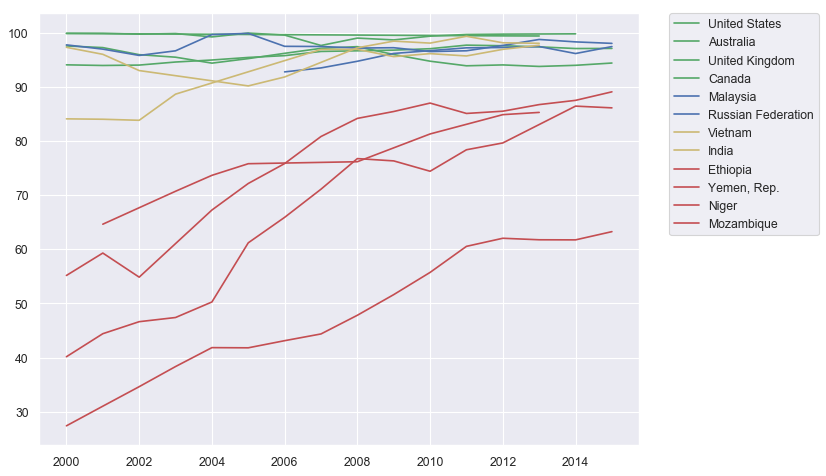

In [9]:
indicator = measure+school_level[0]+", "+gender_type[0]
plot_indicator(indicator,hinc+minc+linc)

### Net enrolment rate in Lower Secondary schools (%)

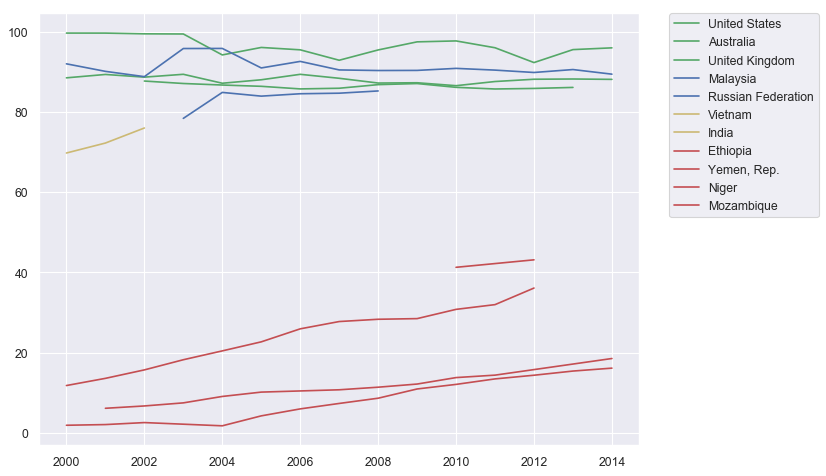

In [10]:
indicator = measure+school_level[1]+", "+gender_type[0]
plot_indicator(indicator,hinc+minc+linc)

### Net enrolment rate in Higher Secondary schools (%)

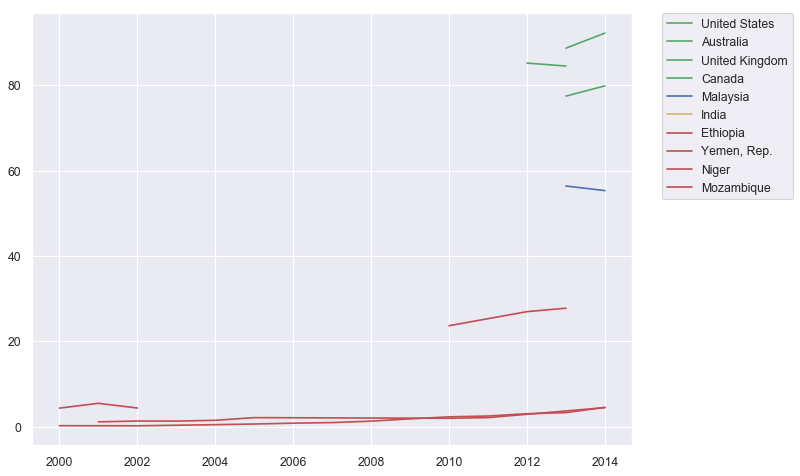

In [11]:
indicator = measure+school_level[2]+", "+gender_type[0]
plot_indicator(indicator,hinc+minc+linc)

In [12]:
for gen in (0,1,3):
    print("Correlation coefficient between net enrollment rate (primary school) for",\
          gender_type[gen].replace('\\',''),"and income:",
          get_clean_corrcoef_income(measure+school_level[0]+", "+gender_type[gen],hinc+minc+linc))

Correlation coefficient between net enrollment rate (primary school) for both sexes (%) and income: 0.7905442132607237
Correlation coefficient between net enrollment rate (primary school) for female (%) and income: 0.8443040775001447
Correlation coefficient between net enrollment rate (primary school) for male (%) and income: 0.7498585815189364


In [13]:
for gen in (0,1,3):
    print("Correlation coefficient between net enrollment rate (lower secondary school) for",\
          gender_type[gen].replace('\\',''),"and income:",
          get_clean_corrcoef_income(measure+school_level[1]+", "+gender_type[gen],hinc+minc+linc))

Correlation coefficient between net enrollment rate (lower secondary school) for both sexes (%) and income: 0.8864870804399166
Correlation coefficient between net enrollment rate (lower secondary school) for female (%) and income: 0.9241009345919866
Correlation coefficient between net enrollment rate (lower secondary school) for male (%) and income: 0.893380541198392


In [14]:
for gen in (0,1,3):
    print("Correlation coefficient between net enrollment rate (higher secondary school) for",\
          gender_type[gen].replace('\\',''),"and income:",
          get_clean_corrcoef_income(measure+school_level[2]+", "+gender_type[gen],hinc+minc+linc))

Correlation coefficient between net enrollment rate (higher secondary school) for both sexes (%) and income: 0.9709843448629143
Correlation coefficient between net enrollment rate (higher secondary school) for female (%) and income: 0.9816838774687192
Correlation coefficient between net enrollment rate (higher secondary school) for male (%) and income: 0.9572617759475552


As we can see, there if definitely a **strong correlation between (%) of youth enrolled in schools and the income level** of that country. In fact, as we break this for the three different school groups, we see that the **correlation becomes stronger as the education level progresses**. 

This can be attributed to the fact that **education costs become more unaffordable** for lower (and middle) income groups as the youth move from primary to lower secondary and higher secondary schools.

## Education and 'Gender' - Enrollment rate in schools based on gender

### Enrollment rate of Females in primary schools (%)

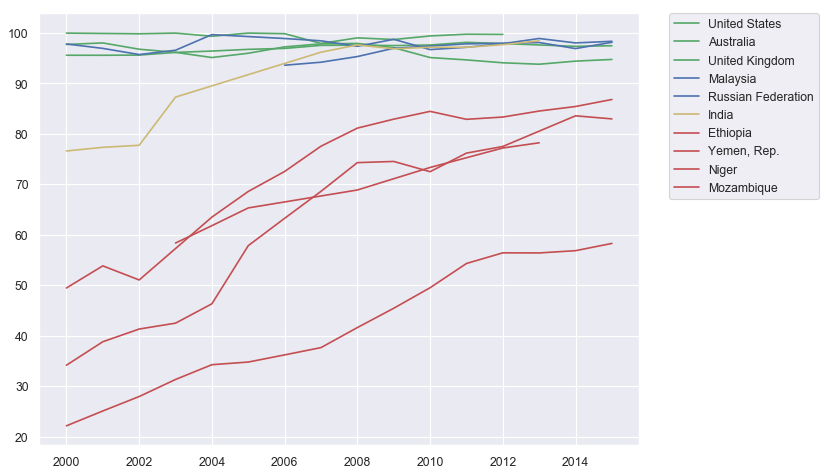

In [15]:
indicator = measure+school_level[0]+", "+gender_type[1]
plot_indicator(indicator,hinc+minc+linc)

### Enrollment rate of Males in primary schools (%)

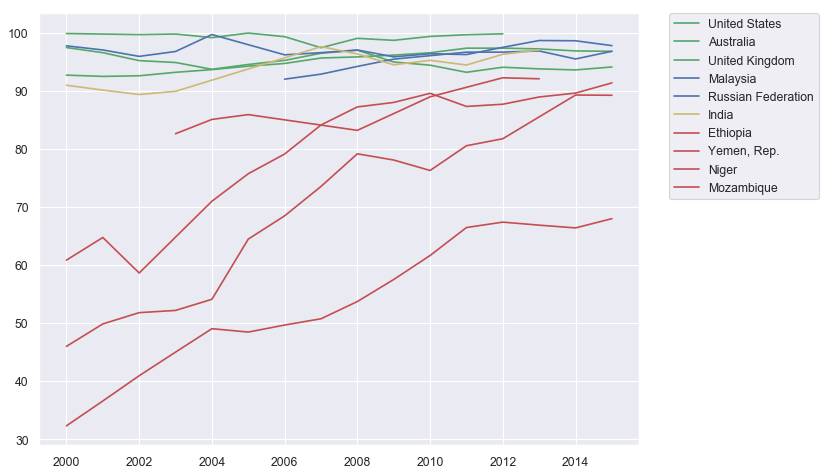

In [16]:
indicator = measure+school_level[0]+", "+gender_type[3]
plot_indicator(indicator,hinc+minc+linc)

In [17]:
def get_clean_corrcoef_gender(sch_level,filtered):
    vals_male, country_male = get_vals_indicator(measure+sch_level+", "+gender_type[3])
    vals_female, country_female = get_vals_indicator(measure+sch_level+", "+gender_type[1])
    filtered_index = [country_male.index(f) for f in filtered]

    vals_male = np.array(itemgetter(*filtered_index)(vals_male))
    country_male = list(itemgetter(*filtered_index)(country_male))
    vals_female = np.array(itemgetter(*filtered_index)(vals_female))
    country_female = list(itemgetter(*filtered_index)(country_female))
    
    # ignore axis where all are nans (sorted reverse for deletion), for all except those, take the mean
    all_nans = sorted(np.where(np.min(np.isnan(vals_male),axis=1)==True)[0],reverse=True)
    for ind in all_nans:
        vals_male = np.delete(vals_male,ind,0)
        del country_male[ind]
    
    all_nans = sorted(np.where(np.min(np.isnan(vals_female),axis=1)==True)[0],reverse=True)
    for ind in all_nans:
        vals_female = np.delete(vals_female,ind,0)
        del country_female[ind]

    class_label = [0]*len(country_male) + [1]*len(country_female)

    return np.corrcoef(np.nanmean(np.append(vals_male,vals_female,axis=0),axis=1),class_label)[1,0]

Let us do this on the basis of income levels. **We will focus on high and low income levels.**

For **low income**:

In [18]:
for sc in (0,1,2):
    print("Correlation coefficient between net enrollment rate ("+school_level[sc]+" school) and gender:",
          get_clean_corrcoef_gender(school_level[sc],linc))

Correlation coefficient between net enrollment rate (primary school) and gender: -0.3995971749509495
Correlation coefficient between net enrollment rate (lower secondary school) and gender: -0.2350184039235554
Correlation coefficient between net enrollment rate (upper secondary school) and gender: -0.15949020570650704


As we can see, there if definitely a **significant negative correlation between (%) of youth enrolled in schools and their gender**. (Negative sign shows that a higher % of men are enrolled than women in low income countries)

For **high income**:

In [19]:
for sc in (0,1,2):
    print("Correlation coefficient between net enrollment rate ("+school_level[sc]+" school) for and gender:",
          get_clean_corrcoef_gender(school_level[sc],hinc))

Correlation coefficient between net enrollment rate (primary school) for and gender: 0.2672277228673321
Correlation coefficient between net enrollment rate (lower secondary school) for and gender: 0.28495045723031975
Correlation coefficient between net enrollment rate (upper secondary school) for and gender: 0.3254144579257231


As we can see, there if definitely a **significant positive correlation between (%) of youth enrolled in schools and their gender**. (Positive sign shows that a higher % of women are enrolled than men in high income countries)

Essentially, for **low income countries, a higher % of men go to (are enrolled in) schools than women** and **for high income countries, a higher % of women go to (are enrolled in) schools than men**. 

It is Interesting to see how the results are so different. This can be attributed to women empowerment and subsidised education for the female population in high income countries and the lack of the same thereof in low income countries. It appears to be true that there is a bias against female education in low income countries that most likely stems from cultural and social beliefs that have propagated down the ages.

This article - [Why girls in India are still missing out on the education they need
](https://www.theguardian.com/education/2013/mar/11/indian-children-education-opportunities) tries to explain the the same problem in some detail.

_"While girls attend primary school in roughly equal numbers to boys, the gap widens as they get older and more are forced to drop out to help with work at home or get married."_ 